#### Making plots for the practice presentation 7/14

In [26]:
import numpy as np
from prospectFunctions import *
from matplotlib.pyplot import *

In [3]:
specs = np.load('specs_sps_tage_10.npy')

In [4]:
params = np.load('params_sps_tage_10.npy')

In [5]:
params[0,0,:,-1]

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [7]:
grid_ranges, run_params = getParams(2, 10,1,10, dust=False)

In [9]:
params.shape

(10, 1, 10, 5)

In [101]:
logzs = grid_ranges['logzsol']
tages = grid_ranges['tage']
dusts = grid_ranges['dust2']

grid_ranges['logzsol'][[0,-1]], grid_ranges['dust2'][[0,-1]], grid_ranges['tage'][[0,-1]]

(array([-1. ,  0.5]), array([0., 0.]), array([0.1, 2. ]))

In [13]:
run_params['dust2'] = grid_ranges['dust2'][0]
run_params['logzsol'] = grid_ranges['logzsol'][0]
run_params['tage'] = grid_ranges['tage'][0]

In [14]:
run_params

{'imf_type': 2,
 'zred': 3.548,
 'mass': 100000000.0,
 'add_duste': False,
 'zcontinuous': 1,
 'dust2': np.float64(0.0),
 'logzsol': np.float64(-1.0),
 'tage': np.float64(0.1)}

In [15]:
sps = getSps(**run_params)
obs = getObs(**run_params)

In [16]:
wspec, wphot = getWave(obs=obs, sps=sps, **run_params)

In [18]:
a = 1.0 + run_params['zred']

In [21]:
rest_wspec = wspec / a

In [22]:
rest_wspec

array([9.100e+01, 9.400e+01, 9.600e+01, ..., 9.817e+07, 9.908e+07,
       1.000e+08], shape=(5994,))

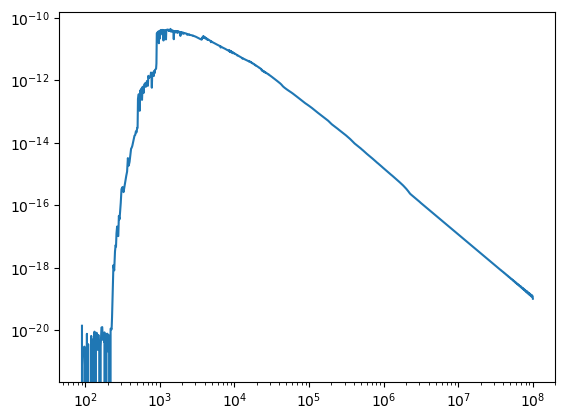

In [25]:
loglog(rest_wspec, specs[0,0,0,:])

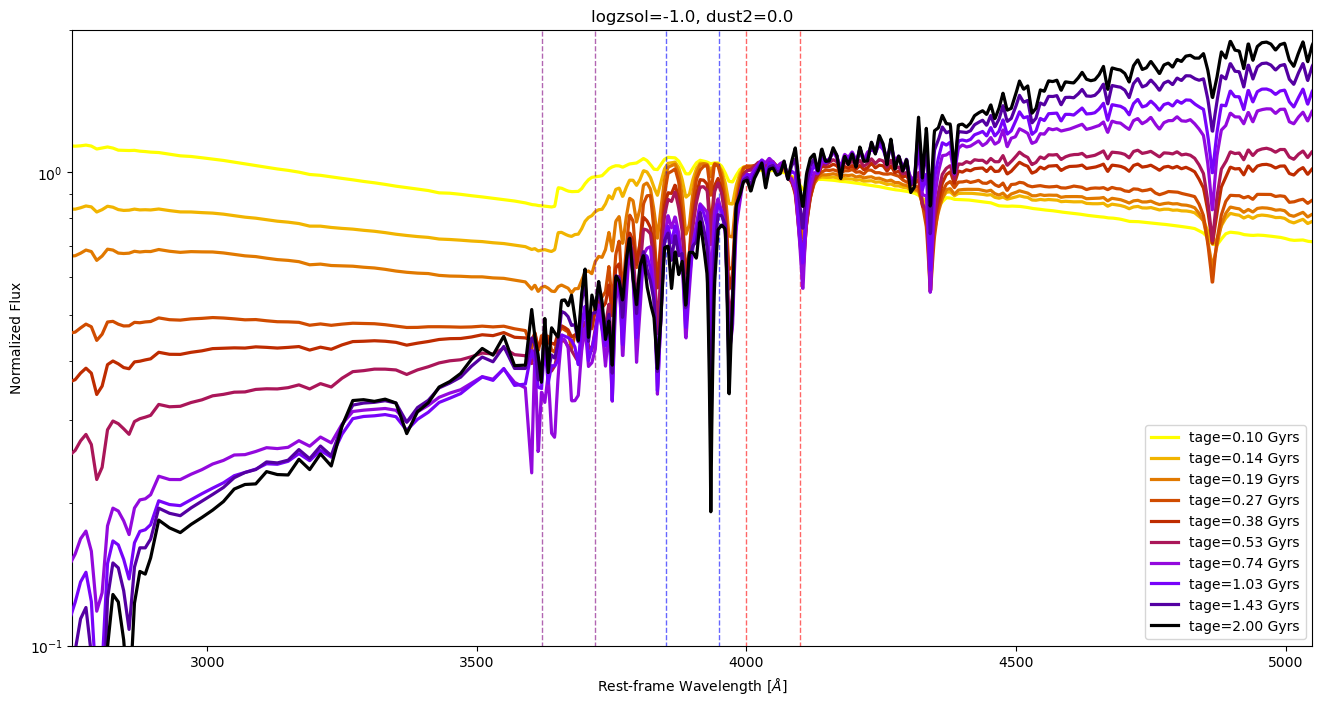

In [96]:
color = cm.gnuplot(np.linspace(1, 0, len(tages)))

figure(figsize=(16,8))

bounds = getBreakBounds(wspec, 4000, **run_params)
blue_l, blue_u = bounds['blue'][0], bounds['blue'][1]

i_logz, i_dust = 0,0

for i_tage in range(len(tages)):

    test_mean = specs[i_logz,i_dust,i_tage,blue_l:blue_u].mean()

    plot(wspec/a, specs[i_logz,i_dust,i_tage,:]/test_mean, lw=2.3, color=color[i_tage], label=f'tage={tages[i_tage]:.2f} Gyrs', zorder=i_tage)

plotBalmerBreakRestFrame(**run_params)

xmin, xmax = (2750), (5050)
# xmin, xmax = (1000), (11000)

yscale('log')

xlim([xmin,xmax])
ylim([1e-1, 2e0])

xlabel(r'Rest-frame Wavelength [$\AA$]')
ylabel('Normalized Flux')

title(f'logzsol={logzs[i_logz]}, dust2={dusts[i_dust]}')

legend()

# savefig('breaks_vs_tage_close_normalized.png')

show()

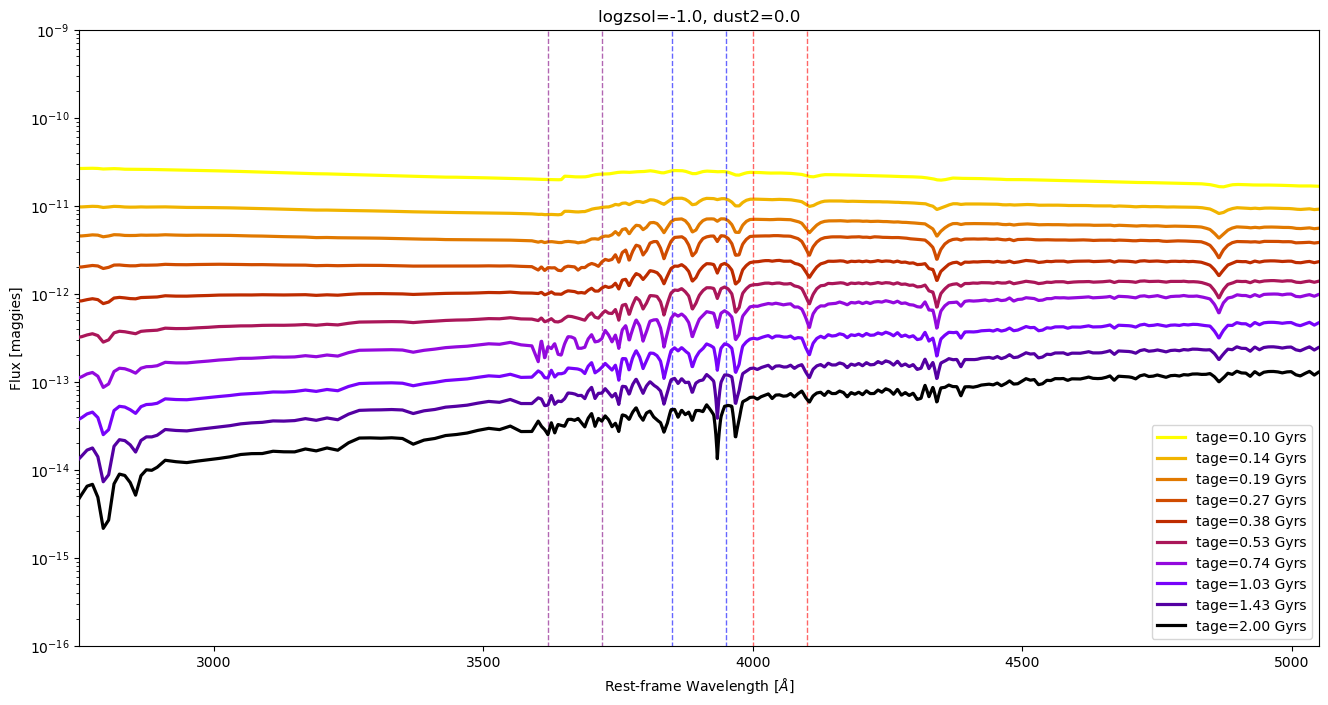

In [97]:
color = cm.gnuplot(np.linspace(1, 0, len(tages)))

figure(figsize=(16,8))

bounds = getBreakBounds(wspec, 4000, **run_params)
blue_l, blue_u = bounds['blue'][0], bounds['blue'][1]

i_logz, i_dust = 0,0

for i_tage in range(len(tages)):

    # test_mean = specs[i_logz,i_dust,i_tage,blue_l:blue_u].mean()

    plot(wspec/a, specs[i_logz,i_dust,i_tage,:], lw=2.3, color=color[i_tage], label=f'tage={tages[i_tage]:.2f} Gyrs', zorder=i_tage)

plotBalmerBreakRestFrame(**run_params)

xmin, xmax = (2750), (5050)
# xmin, xmax = (1000), (11000)

yscale('log')

xlim([xmin,xmax])
ylim([1e-16, 1e-9])

xlabel(r'Rest-frame Wavelength [$\AA$]')
ylabel('Flux [maggies]')

legend()

title(f'logzsol={logzs[i_logz]}, dust2={dusts[i_dust]}')

# savefig('breaks_vs_tage_close.png')

show()

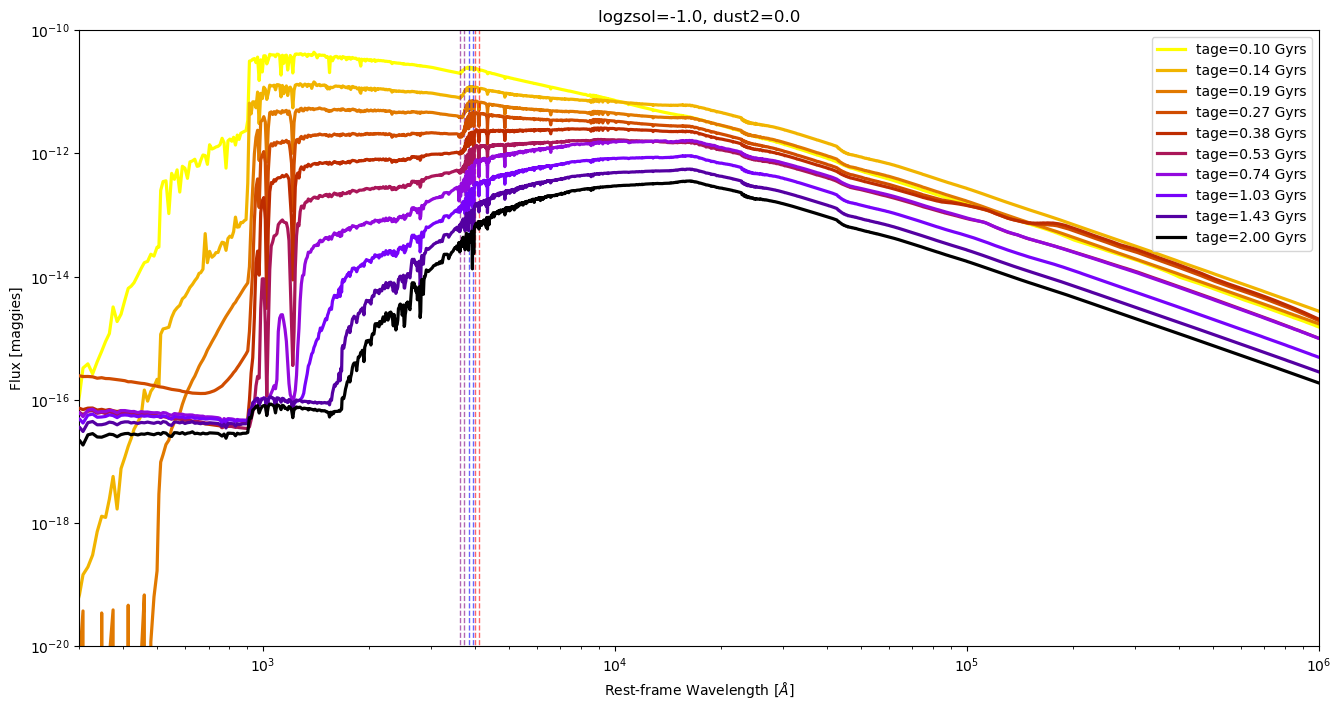

In [98]:
color = cm.gnuplot(np.linspace(1, 0, len(tages)))

figure(figsize=(16,8))

bounds = getBreakBounds(wspec, 4000, **run_params)
blue_l, blue_u = bounds['blue'][0], bounds['blue'][1]

i_logz, i_dust = 0,0

for i_tage in range(len(tages)):

    # test_mean = specs[i_logz,i_dust,i_tage,blue_l:blue_u].mean()

    plot(wspec/a, specs[i_logz,i_dust,i_tage,:], lw=2.3, color=color[i_tage], label=f'tage={tages[i_tage]:.2f} Gyrs', zorder=i_tage)

plotBalmerBreakRestFrame(**run_params)

xmin, xmax = (3e2), (1e6)
# xmin, xmax = (1000), (11000)

xscale('log')
yscale('log')

xlim([xmin,xmax])
ylim([1e-20, 1e-10])

xlabel(r'Rest-frame Wavelength [$\AA$]')
ylabel('Flux [maggies]')

legend()

title(f'logzsol={logzs[i_logz]}, dust2={dusts[i_dust]}')

# savefig('breaks_vs_tage_full.png')

show()